In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import tensorflow as tf


In [7]:
train_df=pd.read_csv("/content/drive/MyDrive/pandas/train.csv")

In [8]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test_df=pd.read_csv("/content/drive/MyDrive/pandas/test.csv")

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [12]:
train_df['label'].value_counts()

,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


In [13]:
train_df.isnull().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [14]:
mnist_train_data = train_df.iloc[:, 1:] / 255.0
mnist_train_label = train_df['label']

mnist_test_data = test_df / 255.0

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    mnist_train_data, mnist_train_label, test_size=0.2, random_state=42, stratify=mnist_train_label
)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


X_train_cnn = X_train.to_numpy().reshape(-1, 28, 28, 1)
X_val_cnn = X_val.to_numpy().reshape(-1, 28, 28, 1)

In [17]:
# Modèle CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model.compile(optimizer=Adam(learning_rate=0.001),
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])


#history = model.fit(X_train_cnn, y_train, validation_data=(X_val_cnn, y_val), epochs=10, batch_size=64)

datagen = ImageDataGenerator(
       rotation_range=10,
       width_shift_range=0.1,
       height_shift_range=0.1,
       zoom_range=0.1
   )

history = model.fit(datagen.flow(X_train_cnn, y_train, batch_size=64),
                       validation_data=(X_val_cnn, y_val),
                       epochs=10)

model.evaluate(X_val_cnn, y_val)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


525/525 ━━━━━━━━━━━━━━━━━━━━ 141s 263ms/step - accuracy: 0.8700 - loss: 0.4250 - val_accuracy: 0.9645 - val_loss: 0.1101
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 141s 269ms/step - accuracy: 0.9199 - loss: 0.2544 - val_accuracy: 0.9758 - val_loss: 0.0751
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 140s 265ms/step - accuracy: 0.9371 - loss: 0.2078 - val_accuracy: 0.9802 - val_loss: 0.0667
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 140s 261ms/step - accuracy: 0.9441 - loss: 0.1865 - val_accuracy: 0.9826 - val_loss: 0.0594
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 140s 267ms/step - accuracy: 0.9478 - loss: 0.1717 - val_accuracy: 0.9789 - val_loss: 0.0614
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 152s 290ms/step - accuracy: 0.9509 - loss: 0.1640 - val_accuracy: 0.9798 - val_loss: 0.0619
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 155s 295ms/step - accuracy: 0.9528 - loss: 0.1568 - val_accuracy: 0.9811 - val_loss: 0.0587
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 137s 260ms/step - accuracy: 0.9526 - loss: 0.15

[0.04526621103286743, 0.9871428608894348]

In [45]:
X_test_cnn = test_df.to_numpy().reshape(-1, 28, 28, 1)
test_predictions_cnn = model.predict(X_test_cnn)
test_pred_classes_cnn = test_predictions_cnn.argmax(axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step


In [53]:
test_pred_classes_cnn

array([2, 0, 8, ..., 3, 8, 2])

In [47]:
submission = pd.DataFrame({
    "ImageId": range(1, len(test_pred_classes_cnn) + 1),
    "Label": test_pred_classes_cnn
})

In [48]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,8
3,4,8
4,5,3
...,...,...
27995,27996,9
27996,27997,2
27997,27998,3
27998,27999,8


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Label: 1
True Label: 1


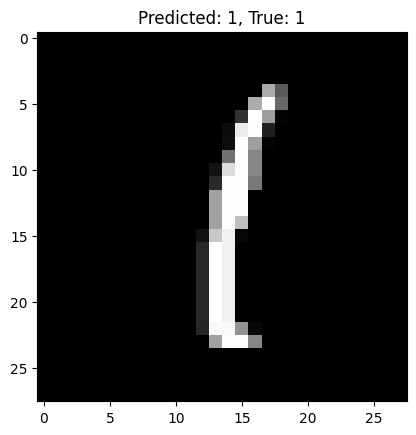

In [51]:
index = 0
img = X_val_cnn[index].reshape(1, 28, 28, 1)
prediction = model.predict(img)
predicted_label = np.argmax(prediction)
print(f"Predicted Label: {predicted_label}")
print(f"True Label: {y_val.iloc[index]}")  # Use iloc for pandas Series indexing
plt.imshow(X_val_cnn[index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label}, True: {y_val.iloc[index]}")
plt.show()

263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step


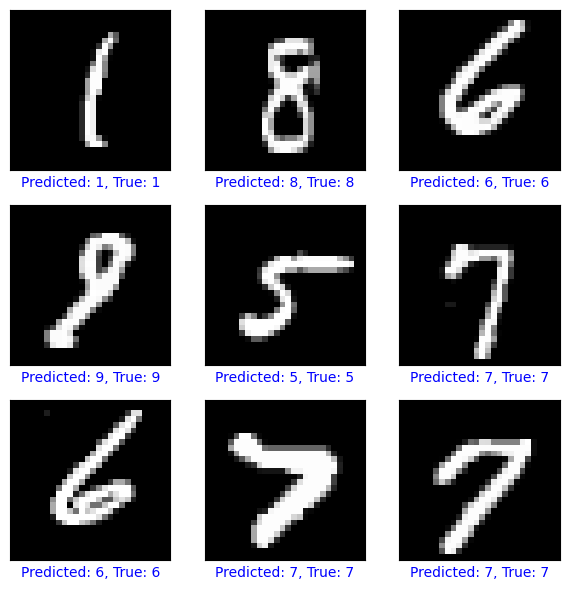

In [49]:
def plot_image_and_prediction(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label.iloc[i], img[i] # Use .iloc for integer-location based indexing
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.reshape(28, 28), cmap='gray')
    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"Predicted: {predicted_label}, True: {true_label}", color=color)

def plot_predictions(predictions, true_labels, images, num_rows=3, num_cols=3):
    num_images = num_rows * num_cols
    plt.figure(figsize=(2 * num_cols, 2 * num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        plot_image_and_prediction(i, predictions, true_labels, images)
    plt.tight_layout()
    plt.show()

# Get predictions for the validation set
validation_predictions = model.predict(X_val_cnn)

plot_predictions(validation_predictions, y_val, X_val_cnn)

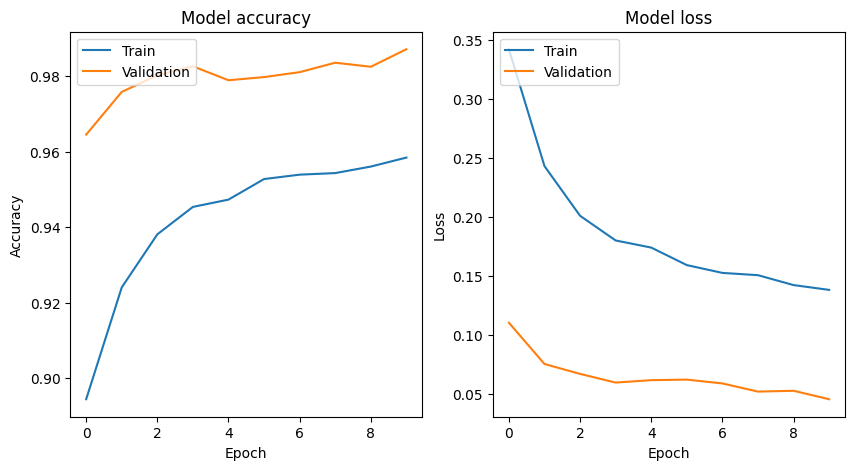

In [50]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()